# Pytorch

Pytorch es una biblioteca creada por Facebook para hacer "programación diferencial".

Una biblioteca de programación diferencial es un sistema en donde haces operaciones y el sistema se "acuerda" de todas las operaciones que hiciste, para poder sacar derivadas.

Por ejemplo, digamos que tienes `a = 5` y `b = 3` y yo le pregunto a python `a*b`. Sin problema me contestará `15`, pero una vez que hace la operación, se olvida de donde venía ese `15`. En programación diferencial no: se acuerda  de que tenía dos variables y que las multipliqué para obtener el 15, así que si luego le pregunto a pytorch por la derivada de `a*b` con respecto a `a` y con respecto a `b`, lo puede sacar (evaluado en `(5,3)`, claro!).

Además, pytorch hace álgebra lineal, claro, y programación diferencial con álgebra lineal.

La unidad básica en pytorch son los *tensores*, que son la generalización de número, vector, matriz, etc. Si hay físicos en la audiencia, me disculpo de antemano (de parte de toda la comunidad de deep learning) por llamarle tensores a esas cosas :)

Algunas notas:

- pytorch está pensado para hacer redes neuronales, pero no es necesario querer hacer redes neuronales para usarlo!
- pytorch es extremadamente rápido. En realidad cuando le dices que multiplique matrices o lo que sea, llama a código hiper-eficiente de C++.
- Puedes usar pytorch directamente en C++, pero no ganas mucho si tus cuellos de botella son las operaciones en sí que estás haciendo.
- Puedes usar pytorch en la GPU, lo cual hace mucho más rápidas las operaciones. Incluso puedes usar muchas GPUs, o un cluster de computadoras cada una con sus GPUs, etc.
- Trae muchas funciones de ayuda para leer imágenes/audio/texto, etc. etc. Es una biblioteca muy completa. En esta lección nos enfocaremos a la manipulación de tensores.

In [2]:
import torch

El siguiente comando debe responder `True`. Si no es así, hay algo mal. Pídele ayuda a Carlos. Esta lección en particular no usará CUDA, y puedes seguir trabajando por ahora así, PERO cuando entremos a redes neuronales no quieres pasar 10 hrs entrenando cuando podrías durar 1 minuto.

In [3]:
torch.cuda.is_available()

True

In [4]:
a = torch.tensor([5.]); a

In [6]:
b = torch.tensor([3.])

In [7]:
a*b

tensor([15.])

In [9]:
a = torch.tensor([[1,2,3],[4,5,6]]); a

tensor([[1, 2, 3],
        [4, 5, 6]])

Ahora, a esos tensores no les dije que necesitaban gradientes, así que no sabe sacar derivadas ni nada. Para poder sacar derivadas, necesito decirlo a la hora de crearlos.

In [ ]:
a = torch.tensor([5.],requires_grad=True)

In [ ]:
a

In [ ]:
b = torch.tensor([3.],requires_grad=True)

In [ ]:
a*b

In [ ]:
mult = a*b

mult.backward() # esto significa "saca derivadas de a*b con respecto a todo"

In [ ]:
a

In [ ]:
a.grad # eso fue la derivada parcial de (a*b) con respecto a, que efectivamente es 3!

In [ ]:
b.grad

In [ ]:
a = torch.tensor([5.],requires_grad=True)
b = torch.tensor([3.],requires_grad=True)
suma = a+b
suma.backward()

Ejercicio:
1. Encuentra la derivada de x^2 + 2x + 5 evaluada en x = 1 (con pytorch).

Ahora, torch puede trabajar con tensores de todo tipo (enteros, boleanos, etc. etc.), pero claro, solo puede sacar derivadas de los floats.

In [ ]:
torch.tensor([1,2,3,4])

In [ ]:
A = torch.tensor([[1.,2,3,4],[5,6,7,8]])

In [ ]:
A

## Propiedades

In [ ]:
A.shape

In [ ]:
A.dtype

In [ ]:
A.device

In [ ]:
A=A.to('cuda')

In [ ]:
A.device

## Operaciones

In [ ]:
A

In [ ]:
10*A

In [ ]:
A-A

In [ ]:
A/5

In [ ]:
A//5

In [ ]:
A**2

In [ ]:
torch.sin(A)

In [ ]:
A.T

In [ ]:
A*A

In [ ]:
A@A.T

In [ ]:
A@A.T

In [ ]:
torch.arange(10)

In [ ]:
torch.arange(10,20,2)

## Generar aleatorios

In [ ]:
A = torch.rand(3,5,5); A

In [ ]:
A=A.to('cuda')

In [ ]:
A

In [ ]:
B = torch.rand(3,5,5); B

In [ ]:
A+B

In [ ]:
B=B.to(A.device)

In [ ]:
A.device

In [ ]:
B.device

In [ ]:
A+B

In [ ]:
B=torch.randn(4,3,2) # normal con media 0 y desviación estándar 1

In [ ]:
B

## Indizar

In [ ]:
A = torch.rand(4,4)

In [ ]:
A.shape

In [ ]:
A

In [ ]:
A[1]

In [ ]:
A[0,0]

In [ ]:
A[:,0].shape

In [ ]:
A[1,:] # equivalente a A[1], claro

In [ ]:
A[1]

In [ ]:
A

In [ ]:
A[1:3,:2]

In [ ]:
A

In [ ]:
A[:,None,:].shape

In [ ]:
A = A[:,None,0,None,None,None]

In [ ]:
A = torch.rand(3,4,5)

In [ ]:
A.shape

In [ ]:
A[:,[2],:].shape

In [ ]:
A=A.squeeze()

In [ ]:
A[:,:,None].shape

In [ ]:
A.unsqueeze(2).shape

In [ ]:
A.shape

In [ ]:
torch.rand(1,10)

In [ ]:
torch.rand(10,1).squeeze()

### Operaciones sobre un tensor

In [ ]:
A = torch.rand(5,3); A

In [ ]:
torch.sum(A)

In [ ]:
torch.sum(A,dim=0)

In [ ]:
torch.sum(A,dim=-1)

## Broadcasting

Una cosa súper padre y súper confusa a veces es el concepto de broadcasting. Si una operación entre tensores no se puede hacer porque las dimensiones no corresponden, a veces se puede hacer: aumentando dimensiones de tamaño "1" (al inicio) y "repitiendo". Vamos a ver un ejemplo.

In [ ]:
A = torch.rand(2,4); A

In [ ]:
A + 3

In [ ]:
A + torch.tensor([3])

In [ ]:
torch.tensor([3]).shape

In [ ]:
A.shape

In [ ]:
A + torch.tensor([10,20,30,40])

In [ ]:
torch.tensor([10,20,30,40]).shape

In [ ]:
torch.tensor([10,20])[:,None] + A

In [ ]:
A.shape

### ¿Cómo funciona?

Las reglas son así (digamos que las dimensiones son (4,2,1,6) y (2,5,6).)

1. Se alinean las dimensiones de los vectores A LA DERECHA 

```txt
4 2 1 6
  2 5 6
```

2. Se completa con 1's aquellos que les falte algo.
```txt
4 2 1 6
1 2 5 6
```

3. Para cada dimensión, si una de ellas es un uno, entonces se convierte a la otra dimensión, repitiendo.
```txt
4 2 5 6
4 2 5 6
```

4. Si alguna dimensión no coincide, hay error. 

### Ejercicios de Broadcasting

1. Súmale 10 al primer renglón y 20 al segundo renglón. Escribe poquito

```txt
2 4
2 1
```

2. Crea una matriz de $n\times m$ donde en la entrada $(i,j)$ esté el número $i+j$. No se vale usar la palabra "for". Con arange e indizar.

3. Dado dos tensores lineales de tamaño $n\times 2$ y $m \times 2$ respectivamente, crea una matriz de $n\times m$ en donde la entrada $(i,j)$ sea la distancia euclideana entre el punto $i$ del primero tensor y el punto $j$ del segundo tensor. Igual, la palabra "for" está prohibida.

4. Implementa, sin usar `@` ni matmul, multiplicación de matrices. Se vale usar *, +, sum y broadcasting.

In [ ]:
n,m = 5, 5
X = torch.arange(n)
Y = torch.arange(m)
X = X[None,:]
Y = Y[:,None]

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
torch.sum(torch.abs(X-Y))

In [ ]:
X[None,:]+Y[:,None]

In [ ]:
A = torch.rand((2,4))

In [ ]:
A

In [ ]:
A + torch.tensor([10,20])[:,None]

Ejercicio: Crea un tensor de 10x5x8 (e.g. 10 matrices de 5x8) y luego multiplica la primera matriz por 0, luego la segunda por 1, etc.

In [ ]:
A = torch.randint(0,10,(10,5,8))

In [ ]:
B = A*torch.arange(10)[:,None,None]

In [ ]:
B

In [ ]:
B.to(dtype=torch.int)

## Máscaras

In [ ]:
A = torch.rand(3,5)

In [ ]:
A

In [ ]:
(A < 0.5)

In [ ]:
A[A<0.5]

Ejercicio: Toma todos aquellos < a 0.5 y cámbialos por 0. (háganlo de 2 maneras)

In [ ]:
A[A<0.5] = 0

In [ ]:
A

In [ ]:
B = (A>=0.5).float()

In [ ]:
B

In [ ]:
A*B

In [ ]:
A = torch.randint(0,10,size=(5,5))

In [ ]:
A

In [ ]:
A[A%2 == 0]

Fíjate que lo convierte a un tensor de dimensión 1, pero se 'acuerda' de donde viene:

In [ ]:
A[A%2 == 0] = 99.

In [ ]:
A

## Indizar avanzado

In [ ]:
A = torch.tensor([[1,2,3,4],[5,6,7,8.]])

In [ ]:
A

In [ ]:
A[:,:-1]

In [ ]:
A[:,torch.tensor([1,3])]

In [ ]:
A = torch.rand(3,3)

In [ ]:
A

In [ ]:
torch.arange(3)

In [ ]:
A[torch.tensor([0,2,1]), torch.arange(3)]

In [ ]:
A = torch.arange(36)

In [ ]:
A

In [ ]:
A = A.reshape(2,18)

In [ ]:
A.shape

In [ ]:
A

`cat`, `stack`, `repeat`

In [ ]:
A = torch.randint(0,5,(3,5)); A

In [ ]:
B = torch.randint(0,5,(7,5)); B

In [ ]:
torch.cat((A,B),dim=1)

In [ ]:
torch.cat((A,B),dim=0)

In [ ]:
torch.stack((A,A,A))

In [ ]:
torch.stack((A,A,A,A))

In [ ]:
torch.cat((A[None],A[None],A[None],A[None]),dim=0)

In [ ]:
A = torch.randint(0,4,(2,2)); A

In [ ]:
A.repeat(3,2)

`view`, `reshape`

In [ ]:
A.shape

In [ ]:
A

In [ ]:
A.view(4,2)

In [ ]:
A.reshape(4,2)

Parecen lo mismo, pero internamente no los acomoda igual en memoria. view sólo cambia las dimensiones, reshape mueve la memoria apropiadamenet para que quede contigua la cosa

In [ ]:
A.view(1,8)

In [ ]:
A.reshape(1,8)

In [ ]:
A = A.cuda()

In [ ]:
torch.zeros_like(A)

In [ ]:
torch.ones_like(A)

Lo mejor de las variantes "_like" es que los pone en el mismo dispositivo que el original (gpu, cpu)

In [ ]:
torch.rand_like(A)

In [ ]:
torch.rand_like(A.float())

In [ ]:
A = A.float()

In [ ]:
A

In [ ]:
B = A/2

In [ ]:
B[B<=2] = 0

In [ ]:
A

In [ ]:
(A<=2).float()*A

## Ejercicios

1. Dado $n$, crea un tensor de $n\times n$ con los números del 1 al $n^2$ en orden. Ejemplo:
```
[1,2,3]
[4,5,6]
[7,8,9]
```

In [ ]:
A = torch.arange(100).reshape(10,10) + 1

2. Convierte el tensor anterior a float32 y sácale raíz cuadrada.

In [ ]:
B=torch.sqrt(A.to(dtype=torch.float))

3. Divide el primer renglón entre 1, el segundo entre 2, el tercero entre 3, etc.

In [ ]:
A

In [ ]:
A.float()/torch.arange(1,11)[:,None]

4. Crea la matriz identidad de dos maneras distintas: con `eye` y sin `eye`.

In [ ]:
torch.eye(5)

In [ ]:
A = torch.arange(10) 

In [ ]:
B=A[:,None]-A[None,:] 

In [ ]:
B

In [ ]:
B[B!=0]=-1 

In [ ]:
B

In [ ]:
B+1

In [ ]:
n = 8
I = torch.arange(n)
A=torch.zeros((n,n))

In [ ]:
A[I,I] = 1

In [ ]:
A

In [ ]:
A =torch.rand((10,10))

In [ ]:
torch.solve(torch.eye(10),A )

In [ ]:
A@torch.inverse(A)

In [ ]:
A.to(dtype=torch.float)

5. Dado una matriz $A$ de $n\times m$ y un vector de enteros $b$ donde todos los números de $b$ van del 0 a m, selecciona los números en las columnas correspondientes a b y ponlos como -1. Por ejemplo, si 
$$A = \begin{bmatrix}
        0 & 1 & 2 & 3 \\
        4 & 5 & 6 & 7 \\
      \end{bmatrix}$$
y $b = [2, 0]$, entonces debe resultar en:
$$A = \begin{bmatrix}
        0 & 1 & -1 & 3 \\
        -1 & 5 & 6 & 7 \\
      \end{bmatrix}$$

In [ ]:
b = torch.randint(0,)

In [ ]:
A[torch.arange(len(A)), b]

In [ ]:
torch.cat((lista o tupla o iterable de tensores), dim=2)

In [ ]:
torch.stack

## Visualizar

Las imágenes en pytorch se ven como tensores de dimensiones $3\times h \times w$ donde $h$ es la altura y $w$ es la anchura.

In [4]:
import torch
import torchvision as tv
from PIL import Image

In [6]:
I = Image.open("COVID19.jpg")

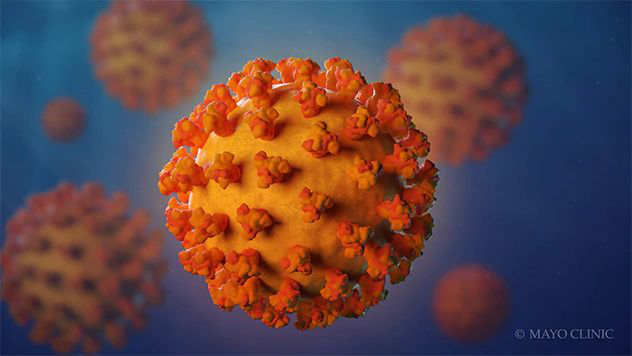

In [7]:
I

In [8]:
type(I)

PIL.JpegImagePlugin.JpegImageFile

Para convertirlas a tensores, se usa una transformación que viene en `torchvision` llamada `ToTensor()`.

In [9]:
to_tensor = tv.transforms.ToTensor()

In [10]:
X=to_tensor(I); X

tensor([[[0.1608, 0.1373, 0.1255,  ..., 0.1059, 0.1176, 0.1373],
         [0.1373, 0.1137, 0.1020,  ..., 0.0627, 0.0745, 0.0941],
         [0.1373, 0.1137, 0.1020,  ..., 0.0510, 0.0627, 0.0863],
         ...,
         [0.0863, 0.0627, 0.0471,  ..., 0.0431, 0.0471, 0.0902],
         [0.1098, 0.0863, 0.0667,  ..., 0.0549, 0.0627, 0.1059],
         [0.1490, 0.1216, 0.1059,  ..., 0.0902, 0.0941, 0.1373]],

        [[0.3333, 0.3098, 0.2980,  ..., 0.2000, 0.2118, 0.2314],
         [0.3098, 0.2863, 0.2745,  ..., 0.1569, 0.1686, 0.1882],
         [0.3098, 0.2863, 0.2745,  ..., 0.1451, 0.1569, 0.1804],
         ...,
         [0.1373, 0.1137, 0.0980,  ..., 0.0745, 0.0784, 0.1216],
         [0.1608, 0.1373, 0.1176,  ..., 0.0863, 0.0941, 0.1373],
         [0.2000, 0.1725, 0.1569,  ..., 0.1216, 0.1255, 0.1686]],

        [[0.4784, 0.4549, 0.4431,  ..., 0.3490, 0.3608, 0.3804],
         [0.4549, 0.4314, 0.4196,  ..., 0.3059, 0.3176, 0.3373],
         [0.4549, 0.4314, 0.4196,  ..., 0.2941, 0.3059, 0.

In [11]:
X.shape

torch.Size([3, 356, 632])

La podemos regresar a una imagen de PIL con `ToPILImage`:

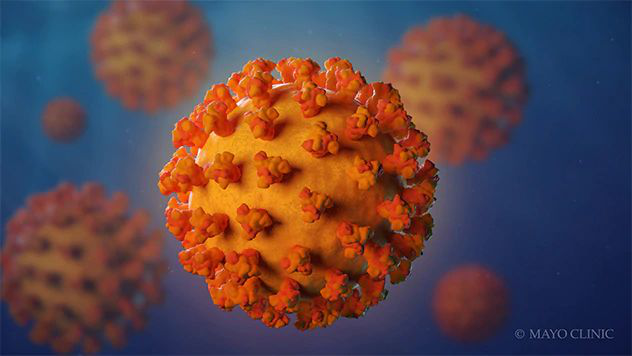

In [12]:
to_image = tv.transforms.ToPILImage()
to_image(X)

In [ ]:
to_image(torch.rand(4,256,256))

### Ejercicios de imágenes

1. Muestra la imagen cortada a la mitad horizontalmente, dejando la parte de arriba.
2. Muestra la imagen cortada a la mitad verticalmente, dejando la parte derecha.
3. Llena la mitad de la imagen diagonalmente (tú escoge la diagonal) con negro y muestra la imagen.

In [ ]:
c,h,w = X.shape

In [ ]:
to_image(X[:,:h//2,:])

In [ ]:
to_image(X[:,:,w//2:])

In [ ]:
x = torch.arange(w)
y = torch.arange(h)

In [ ]:
mascara = (x[None,:] > y[:,None])

In [ ]:
mascara

In [ ]:
mascara = mascara.float()[None,:,:]

In [ ]:
mascara.shape

In [ ]:
to_image(mascara*X)

#### Más Ejercicios:

4. Convierte la imagen a escala de grises (directo con pytorch, obviamente)
5. Encuentra el **color promedio** de la imagen.
6. Para cada pixel, pon como 0 aquellos valores que estén debajo del promedio (de su propio color).
7. Todos los pixeles que sean mayormente azules conviértelos a blanco y negro. Los pixeles mayormente rojos o verdes déjalos como están.

In [ ]:
B = torch.mean(X,dim=0)[None]

In [ ]:
to_image(B.repeat((3,1,1)))

In [ ]:
color_promedio = torch.mean(torch.mean(X,dim=1),dim=1)

In [ ]:
color_promedio

In [ ]:
color_promedio.shape

In [ ]:
X[X < color_promedio[:,None,None]] = 0

In [ ]:
to_image(X)

In [ ]:
V,I = torch.max(X,dim=0)

In [ ]:
mask = (I == 2)

In [ ]:
B = B.repeat((3,1,1))

In [ ]:
mask = mask.repeat((3,1,1))

In [ ]:
X[mask] = B[mask]

In [ ]:
mask = (X[2] > X[1]).float()*(X[2] > X[0]).float()

In [ ]:
mask.shape

In [ ]:
to_image(X)

#### Más Ejercicios

8. Crea una imagen que parezca un tablero de ajedrez.
9. Crea una imagen que parezca ruido de televisión (e.g. aleatorio pero en escala de grises)
10. Crea una imagen que parezca una gradiente horizontal y luego una gradiente vertical.

## Optimización numérica

Si tienes derivadas parciales, puedes encontrar mínimos (o máximos) locales fácilmente. Pytorch trae optimizadores que hacen esto por ti.

Por ejemplo, digamos que queremos encontrar un mínimo local de $x^2-10x + 1$ o lo que sea (agregale senos, cosenos, y otras cosas complicadas si quieres hacer algo que no podrías hacer analíticamente). 

Vamos a usar **descenso por la gradiente**.

In [52]:
import torch
from torch import optim

from tqdm import tqdm

In [53]:
def f(x): 
    return x**2 - 10*x + 1

In [64]:
x = torch.randn(1)*5

In [65]:
x

tensor([-2.1828])

In [66]:
x = x.requires_grad_(True)

In [ ]:
optimizer = optim.SGD([x], lr=0.01)

SGD es "decenso por la gradiente". En cada paso hace:

$$x = x - \alpha\frac{\partial f}{\partial x}$$

donde $\alpha$ es el "learning rate" (`lr`) y $f$ es la pérdida (aquello con lo que llamemos `backward`) con respecto a $x$.

Hay optimizadores mucho más avanzados. SGD tiene un parámetro opcional llamado "momento":

In [69]:
optimizer = optim.SGD([x], lr=0.001, momentum=0.9)

Además, hay mucho mejores optimizadores:

En redes neuronales el más utilizado es "Adam", que es muy bueno, aunque hay incluso mejores ("Ranger" es el mejor que he visto en mis propios experimentos, pero es medio nuevo). En la literatura matemática, en teoría, LBFGS se supone que es muy bueno, aunque en redes neuronales no sirve tan bien.

In [70]:
num_steps = 1000
for step in tqdm(range(num_steps)):
    optimizer.zero_grad()
    loss = f(x)
    loss.backward()
    optimizer.step()

100%|██████████| 1000/1000 [00:00<00:00, 3684.67it/s]


In [71]:
x

tensor([5.0000], requires_grad=True)

Vamos a hacer una función que haga lo anterior:

In [74]:
def optimize(f, num_steps = 15000, lr = 0.001, initial = None):
    x = torch.randn(1) if initial is None else initial
    x = x.requires_grad_(True)
    optimizer = optim.SGD([x], lr=lr, momentum=0.9)
    for step in tqdm(range(num_steps)):
        optimizer.zero_grad()
        loss = f(x)
        loss.backward()
        optimizer.step()
    return f(x),x

## Ejercicios

En todos los siguientes ejercicios, encuentra soluciones aproximadas!

1. Encuentra un mínimo local de $\cos(x)$.
2. Encuentra una raíz de $\sin(x+1) + x\cos(2x^2)$
3. Encuentra una raiz de $\sin(x) + \cos(y+1)$ que satisfaga $\sqrt{|x|} + \log(1+|y|) = 2$.

Como verán, no siempre encuentra soluciones óptimas, en particular si escoges learning rates grandes. Muchas veces lo que haces es ir disminuyendo el learning rate:

Soluciones de Iván:

In [79]:
optimize(torch.cos)

100%|██████████| 15000/15000 [00:02<00:00, 7203.28it/s]


(tensor([-1.], grad_fn=<CosBackward>), tensor([-3.1416], requires_grad=True))

In [80]:
def f(x):
    t = torch.sin(1+x)+torch.cos(2*(x**2))
    return torch.abs(t)

In [81]:
optimize(f) 

100%|██████████| 15000/15000 [00:04<00:00, 3251.37it/s]


(tensor([0.0172], grad_fn=<AbsBackward>),
 tensor([-0.9147], requires_grad=True))

In [82]:
def f(x): 
    t = torch.sin(x[0])+torch.cos(x[1]+1)
    condicion = torch.sqrt(torch.abs(x[0]))+torch.log(1+torch.abs(x[1]))-2
    return t*t + condicion*condicion

zero = torch.tensor([1.0,0.0]) 
zero = zero.requires_grad_(True) 
optimize(f,initial=zero)

100%|██████████| 15000/15000 [00:08<00:00, 1860.27it/s]


(tensor(4.0007e-11, grad_fn=<AddBackward0>),
 tensor([1.0636, 1.6344], requires_grad=True))

In [84]:
[optimize(f,lr=lr,initial=torch.randn(2)) for lr in [0.1, 0.01,0.05, 0.001, 0.0005]]

100%|██████████| 15000/15000 [00:08<00:00, 1863.67it/s]


[(tensor(1.9984e-15, grad_fn=<AddBackward0>),
  tensor([-2.9120,  0.3412], requires_grad=True)),
 (tensor(2.3093e-13, grad_fn=<AddBackward0>),
  tensor([1.0636, 1.6344], requires_grad=True)),
 (tensor(3.5527e-13, grad_fn=<AddBackward0>),
  tensor([-1.6311, -1.0603], requires_grad=True)),
 (tensor(4.0007e-11, grad_fn=<AddBackward0>),
  tensor([1.0636, 1.6344], requires_grad=True)),
 (tensor(4.1121e-05, grad_fn=<AddBackward0>),
  tensor([-1.5651, -1.1128], requires_grad=True))]

In [85]:
optimizer.defaults

{'lr': 0.001,
 'momentum': 0.9,
 'dampening': 0,
 'weight_decay': 0,
 'nesterov': False}

In [ ]:
def optimize(f, num_steps = 20000, lr_start = 0.01, lr_end = 0.00001, initial = None):
    x = torch.randn(1) if initial is None else initial
    x = x.requires_grad_(True)
    optimizer = optim.SGD([x], lr=lr_start, momentum=0.9)
    for step in tqdm(range(num_steps)):
        optimizer.defaults['lr'] = lr_start + (lr_end-lr_start)*step/num_steps
        optimizer.zero_grad()
        loss = f(x)
        loss.backward()
        optimizer.step()
    return f(x),x

Incluso se vale hacer learning rates diferentes para cada parámetro, etc. (pasándole un diccionario en vez de un número a la learning rate). Pero eso, ya es otra historia.

Untitled**Nota**: Pytorch trae una cantidad **masiva** de cosas. pueden verlo en la documentación. Cualquier cosa que quieras hacer, seguro puedes!

- [Tutoriales](https://pytorch.org/tutorials/)
- [Documentación](https://pytorch.org/docs/stable/index.html)